# Knowledge Graph from Dependency

Parse knowledge graph from dependency parsing.

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/knowledge-graph-from-dependency](https://github.com/huseinzol05/Malaya/tree/master/example/knowledge-graph-from-dependency).
    
</div>

<div class="alert alert-warning">

This module only trained on standard language structure, so it is not save to use it for local language structure.
    
</div>

In [1]:
%%time

import malaya

CPU times: user 5.19 s, sys: 1.03 s, total: 6.21 s
Wall time: 6.78 s


### Load dependency parsing models

Read more about dependency parsing at https://malaya.readthedocs.io/en/latest/load-dependency.html

In this example, I am going to load stacks of dependency parsing models.

In [2]:
quantized_model = malaya.dependency.transformer(model = 'xlnet', quantized = True)
alxlnet = malaya.dependency.transformer(model = 'alxlnet')

### Predict dependency parsing

In [3]:
s = 'Najib yang juga Ahli Parlimen Pekan memuji sikap Ahli Parlimen Langkawi itu yang mengaku bersalah selepas melanggar SOP kerana tidak mengambil suhu badan ketika masuk ke sebuah surau di Langkawi pada Sabtu lalu'
tagging, indexing = malaya.stack.voting_stack([quantized_model, alxlnet, quantized_model], s)

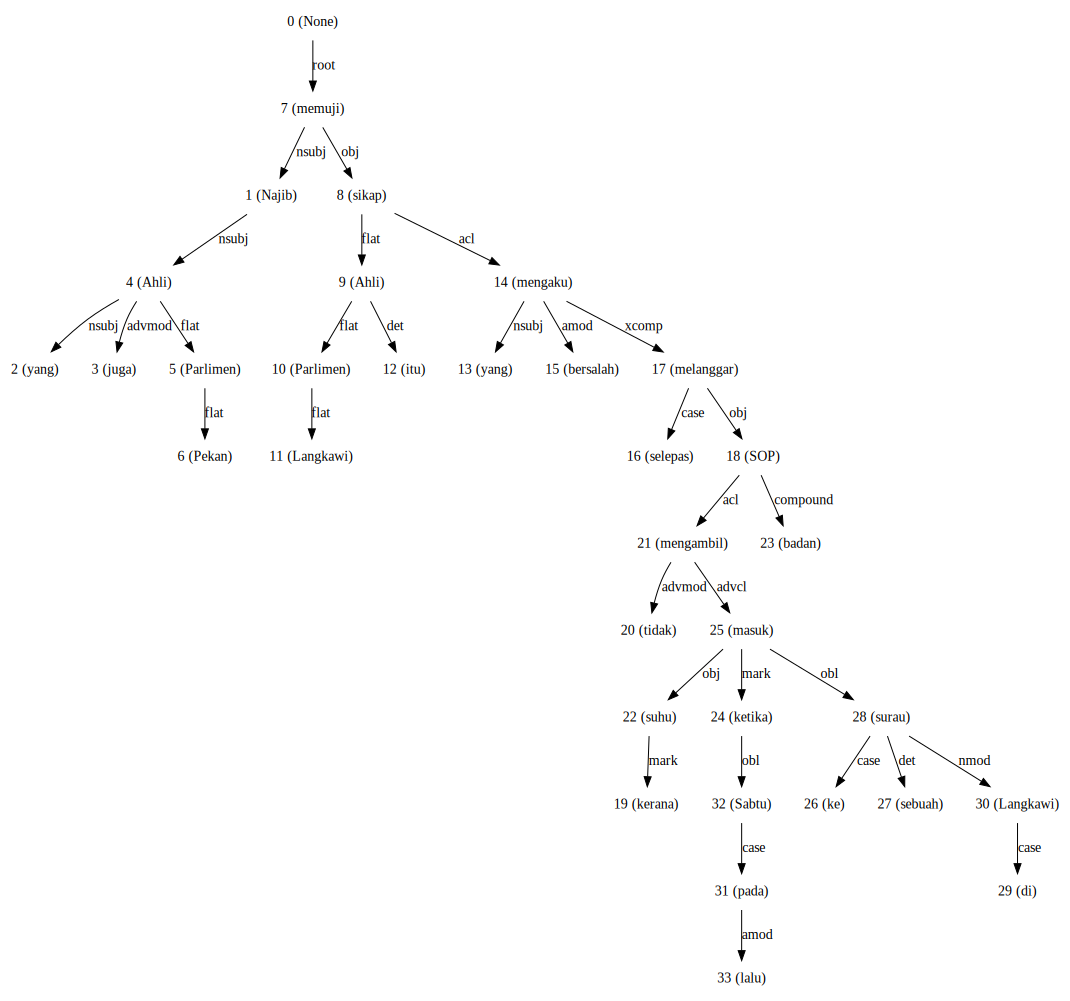

In [4]:
d_object = malaya.dependency.dependency_graph(tagging, indexing)
d_object.to_graphvis()

### Parse knowledge graph from dependency

```python
def parse_from_dependency(tagging, indexing,
                          subjects=[['flat', 'subj', 'nsubj', 'csubj']],
                          relations=[['acl', 'xcomp', 'ccomp', 'obj', 'conj', 'advcl'], ['obj']],
                          objects=[['obj', 'compound', 'flat', 'nmod', 'obl']],
                          get_networkx=True):
    """
    Generate knowledge graphs from dependency parsing.

    Parameters
    ----------
    tagging: List[Tuple(str, str)]
        `tagging` result from dependency model.
    indexing: List[Tuple(str, str)]
        `indexing` result from dependency model.
    subjects: List[List[str]], optional
        List of dependency labels for subjects.
    relations: List[List[str]], optional
        List of dependency labels for relations.
    objects: List[List[str]], optional
        List of dependency labels for objects.
    get_networkx: bool, optional (default=True)
            If True, will generate networkx.MultiDiGraph.

    Returns
    -------
    result: Dict[result, G]
    """
```

In [5]:
r = malaya.knowledge_graph.parse_from_dependency(tagging, indexing)

In [6]:
r

{'result': [{'subject': 'Najib Ahli Parlimen Pekan',
   'relation': 'memuji sikap mengaku melanggar SOP mengambil masuk',
   'object': 'suhu'},
  {'subject': 'Najib Ahli Parlimen Pekan',
   'relation': 'memuji sikap',
   'object': 'Ahli Parlimen Langkawi'}],
 'G': <networkx.classes.multidigraph.MultiDiGraph at 0x140338c10>}

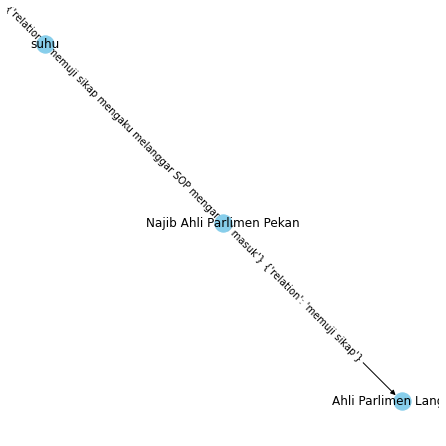

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

g = r['G']
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(g)
nx.draw(g, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
nx.draw_networkx_edge_labels(g, pos=pos)
plt.show()